In [ ]:
from math import log, sqrt, pi, exp, e
import unittest
import numpy as np
from scipy.stats import norm, mvn
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame


In [2]:
from alpaca.data import StockHistoricalDataClient
import websocket
import json
import keys

def on_open(ws):
    print("WebSocket connection opened")
    auth_data = {
        "action": "auth",
        "key": keys.API_KEY,
        "secret": keys.SECRET_KEY
    }
    ws.send(json.dumps(auth_data))

    # Modify this part for your subscription preferences
    subscribe_message = {
        "action": "subscribe",
        "trades": ["AAPL"],  # Replace with your preferred symbols
        "quotes": ["AMD", "CLDR"],  # Replace with your preferred symbols
        "bars": ["*"]  # Subscribe to all symbols
    }
    ws.send(json.dumps(subscribe_message))

def on_message(ws, message):
    print("Message received:")
    print(message)

socket_url = "wss://stream.data.alpaca.markets/v2/iex"  # Use "iex" based on your subscription
ws = websocket.WebSocketApp(socket_url, on_open=on_open, on_message=on_message)
ws.run_forever()


WebSocket connection opened
Message received:
[{"T":"success","msg":"connected"}]
Message received:
[{"T":"success","msg":"authenticated"}]
Message received:
[{"T":"subscription","trades":["AAPL"],"quotes":["AMD","CLDR"],"bars":["*"],"updatedBars":[],"dailyBars":[],"statuses":[],"lulds":[],"corrections":["AAPL"],"cancelErrors":["AAPL"]}]


True

# Black Scholes Model 
The Black-Scholes model is a widely used mathematical framework for calculating the theoretical price of European-style options. One of its key assumptions is that the path the underlying asset takes to reach its future value doesn't matter for option pricing; only the distribution of possible prices at the option's expiration date is important. This is known as the "path-independence" or "path-irrelevance" principle.

The reason for this assumption is that European options can only be exercised at expiration, which means the option holder cannot take advantage of price movements along the way. Consequently, the value of a European option depends solely on the probability distribution of the underlying asset's price at the expiration date.

While the Black-Scholes model simplifies many aspects of real-world financial markets, it has been highly influential in options pricing and risk management. However, it does have limitations:

1. **Assumptions:** The model makes several assumptions that do not always hold in reality, such as constant volatility, continuous trading, and constant interest rates.

2. **Implied Volatility:** The model cannot directly account for changes in implied volatility, which is an important factor in option pricing. In practice, options traders often use the Black-Scholes model in reverse to derive implied volatility from market prices.

3. **Dividends and Transaction Costs:** The model does not consider dividends paid by the underlying asset and transaction costs, which can be significant in real-world scenarios.

4. **Path Dependence:** While the model assumes path-independence for European options, this is not true for some other types of options, such as American options or exotic options.

5. **Market Behavior:** The model assumes that financial markets follow a geometric Brownian motion, which may not accurately capture the dynamics of all assets in all market conditions.

Due to these limitations, the Black-Scholes model is often used as a starting point for option pricing and risk management, but modifications and other models may be employed in practice to address these issues, especially when dealing with more complex financial instruments or when assumptions of the Black-Scholes model are not met. There are variations of the Black-Scholes Model that relax some of these assumptions to make it more applicable to real-world situations. For example:

- The Black-Scholes-Merton model extends the basic model to include dividends, making it suitable for stocks that pay dividends.

- The Black 76 model is a variation used for options on futures contracts. It adapts the original model to account for the differences between stock options and options on futures.

- The Garman-Kohlhagen model is an extension of the Black-Scholes Model used in the foreign exchange market to account for currency options.

These variations address specific market conditions and financial instruments by adjusting the assumptions to better reflect the reality of the underlying assets and markets. The choice of model depends on the specific circumstances and the assets being considered.


![BSM Equation.png](<attachment:BSM Equation.png>)

- S = underlying price (in dollars)
- K = strike price (in dollars)
- σ (sigma) = volatility (% p.a.)
- r = continuously compounded risk-free interest rate (% p.a.)
- q = continuously compounded dividend yield (% p.a.)
- t = time to expiration (% of year)
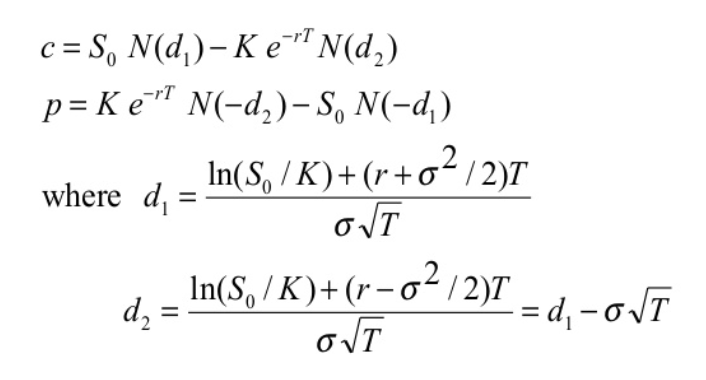

S = underlying price (in dollars)
K = strike price (in dollars)
σ (sigma) = volatility (% p.a.)
r = continuously compounded risk-free interest rate (% p.a.)
q = continuously compounded dividend yield (% p.a.)
t = time to expiration (% of year)


In [8]:
## Defining d1 and d2 in BSM
def d1(S, K, r, t, sigma):
    return (log(S/K) + (r + (sigma * sigma)/2) * t) / sigma * sqrt(t)
def d2(S, K, r, t, sigma):
    return d1(S, K, r, t, sigma) - sigma * sqrt(t)

## Defining BSM for Calls 
def BSM_Call(S, K, r, t, sigma):
    return S * norm.cdf(d1(S, K, r, t, sigma)) - K*exp((-1)*r*t)*norm.cdf(d2(S, K, r, t, sigma))
## Defining BSM for Puts
def BSM_Put(S, K, r, t, sigma):
    return 

SyntaxError: incomplete input (1874520311.py, line 19)